In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import StandardScaler

from scipy.stats import boxcox 

from scipy.special import inv_boxcox 

from pickle import dump

import random

np.random.seed(42)

In [2]:
df=pd.read_csv('Hourly_Combined_Dataset.csv')
df.head()

,date,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed
0,2015-01-01,0,4.405,0.0238,0.0102,100.3,NaN,0.0017,1017.79,26.96,58.390909,33.80,0.8
1,2015-01-01,1,4.104,0.0219,0.0073,49.4,NaN,0.0016,1018.45,23.00,58.000000,32.18,1.3
2,2015-01-01,2,0.611,0.0108,-0.0021,48.3,NaN,0.0007,1018.85,26.06,60.909091,32.00,1.4
3,2015-01-01,3,0.602,0.0094,0.0000,32.9,NaN,0.0004,1019.25,24.08,60.381818,31.82,0.7
4,2015-01-01,4,0.869,0.0089,0.0008,35.4,NaN,0.0004,1019.65,23.00,65.127273,31.64,1.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59602 entries, 0 to 59601
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 59602 non-null  object 
 1   start_hour           59602 non-null  int64  
 2   CO                   55336 non-null  float64
 3   NO2                  55708 non-null  float64
 4   OZONE                56456 non-null  float64
 5   PM10                 57826 non-null  float64
 6   PM25                 53874 non-null  float64
 7   SO2                  54995 non-null  float64
 8   Barometric_Pressure  55082 non-null  float64
 9   Dewpoint             56770 non-null  float64
 10  Relative_Humidity    58916 non-null  float64
 11  Temperature          59129 non-null  float64
 12  Wind_Speed           53773 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 5.9+ MB


In [4]:
df.index = (pd.to_datetime(df['date']) + pd.to_timedelta(df['start_hour'], unit='h'))

In [5]:
df.sort_index(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59602 entries, 2015-01-01 00:00:00 to 2021-10-19 09:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 59602 non-null  object 
 1   start_hour           59602 non-null  int64  
 2   CO                   55336 non-null  float64
 3   NO2                  55708 non-null  float64
 4   OZONE                56456 non-null  float64
 5   PM10                 57826 non-null  float64
 6   PM25                 53874 non-null  float64
 7   SO2                  54995 non-null  float64
 8   Barometric_Pressure  55082 non-null  float64
 9   Dewpoint             56770 non-null  float64
 10  Relative_Humidity    58916 non-null  float64
 11  Temperature          59129 non-null  float64
 12  Wind_Speed           53773 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
df=df.loc[df.index < '2021-04-01']

In [8]:
df.head()

,date,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed
2015-01-01 00:00:00,2015-01-01,0,4.405,0.0238,0.0102,100.3,NaN,0.0017,1017.79,26.96,58.390909,33.80,0.8
2015-01-01 01:00:00,2015-01-01,1,4.104,0.0219,0.0073,49.4,NaN,0.0016,1018.45,23.00,58.000000,32.18,1.3
2015-01-01 02:00:00,2015-01-01,2,0.611,0.0108,-0.0021,48.3,NaN,0.0007,1018.85,26.06,60.909091,32.00,1.4
2015-01-01 03:00:00,2015-01-01,3,0.602,0.0094,0.0000,32.9,NaN,0.0004,1019.25,24.08,60.381818,31.82,0.7
2015-01-01 04:00:00,2015-01-01,4,0.869,0.0089,0.0008,35.4,NaN,0.0004,1019.65,23.00,65.127273,31.64,1.1


### Pre Processing: Nulls handling, Outlier, and time series stationarity.

Refer this https://diegousai.io/2019/12/time-series-machine-learning-analysis-and-demand-forecasting/

https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

https://www.kdnuggets.com/2020/04/lstm-time-series-prediction.html

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://medium.com/data-science-in-your-pocket/preprocessing-for-time-series-forecasting-3a331dbfb9c2 (refr this)

In [9]:
#Number of nulls in the dataframe
df.isna().sum()

date                      0
start_hour                0
CO                     3903
NO2                    3543
OZONE                  2846
PM10                   1740
PM25                   5710
SO2                    4269
Barometric_Pressure    4485
Dewpoint               2539
Relative_Humidity       545
Temperature             441
Wind_Speed              995
dtype: int64

In [10]:
df['year']=df.index.year

In [11]:
df[pd.isnull(df['CO'])].year.value_counts()

2020    1071
2018     851
2017     600
2016     446
2015     427
2019     417
2021      91
Name: year, dtype: int64

In [12]:
df.loc[df.CO.isnull() & (df.year==2015)].head(4)

,date,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,year
2015-01-13 04:00:00,2015-01-13,4,NaN,NaN,NaN,20.7,1.99,NaN,1017.52,46.94,79.831250,53.24,1.6,2015
2015-01-14 04:00:00,2015-01-14,4,NaN,NaN,NaN,9.3,1.06,NaN,1020.05,26.96,41.750000,48.74,2.3,2015
2015-01-15 04:00:00,2015-01-15,4,NaN,NaN,NaN,7.3,0.82,NaN,1023.79,26.96,47.958824,47.12,1.4,2015
2015-01-16 04:00:00,2015-01-16,4,NaN,NaN,NaN,19.0,0.48,NaN,1022.45,28.04,50.229412,48.20,1.9,2015


In [13]:
df.fillna(method='ffill',inplace=True)

In [14]:
#Number of nulls in the dataframe
df.isna().sum()

date                    0
start_hour              0
CO                      0
NO2                     0
OZONE                   0
PM10                    0
PM25                   34
SO2                     0
Barometric_Pressure     0
Dewpoint                0
Relative_Humidity       0
Temperature             0
Wind_Speed              0
year                    0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,date,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,year
2015-01-02 10:00:00,2015-01-02,10,0.110,0.0046,0.0280,47.6,6.42,0.0006,1021.25,32.00,35.84375,51.98,4.1,2015
2015-01-02 11:00:00,2015-01-02,11,0.104,0.0033,0.0333,41.5,6.42,0.0005,1020.05,30.02,32.15625,55.76,3.0,2015
2015-01-02 12:00:00,2015-01-02,12,0.097,0.0028,0.0370,31.0,12.50,0.0004,1018.99,17.96,27.46250,60.26,2.3,2015
2015-01-02 13:00:00,2015-01-02,13,0.122,0.0034,0.0370,27.9,8.26,0.0003,1018.59,15.08,27.15000,61.88,0.8,2015
2015-01-02 14:00:00,2015-01-02,14,0.129,0.0034,0.0390,28.4,9.53,0.0003,1018.19,10.04,27.06250,62.78,1.7,2015


In [17]:
df.describe()

,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,year
count,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000,54734.000000
mean,11.501279,0.313057,0.011204,0.031473,51.864927,8.603243,0.000596,1012.754039,37.793729,43.303643,75.847410,3.444479,2017.640114
std,6.922126,0.420764,0.011009,0.019079,66.789632,23.404991,0.000774,6.379768,14.826179,20.767977,17.405742,2.915262,1.806798
min,0.000000,-0.118000,-0.000200,-0.001800,-4.000000,-15.240000,-0.000200,984.976000,-23.980000,0.000000,31.460000,0.000000,2015.000000
25%,6.000000,0.127000,0.003500,0.015200,21.800000,1.970000,0.000200,1007.920000,28.040000,27.072321,62.240000,1.400000,2016.000000
50%,12.000000,0.175000,0.006600,0.032200,36.800000,5.050000,0.000400,1011.790000,37.040000,40.000000,75.020000,2.500000,2018.000000
75%,18.000000,0.296000,0.015600,0.045400,59.500000,9.100000,0.000700,1016.720000,46.940000,56.000000,88.880000,4.500000,2019.000000
max,23.000000,8.689000,0.096200,0.122500,4621.600000,1343.900000,0.016200,1039.590000,82.040000,100.000000,123.080000,24.900000,2021.000000


### Following columns have negative values:
1. CO
2. NO2
3. OZONE
4. PM10
5. PM2.5
6. SO2
7. Dewpoint

Dew Point can be negative.

Leave for now.

### Visualizations

In [18]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

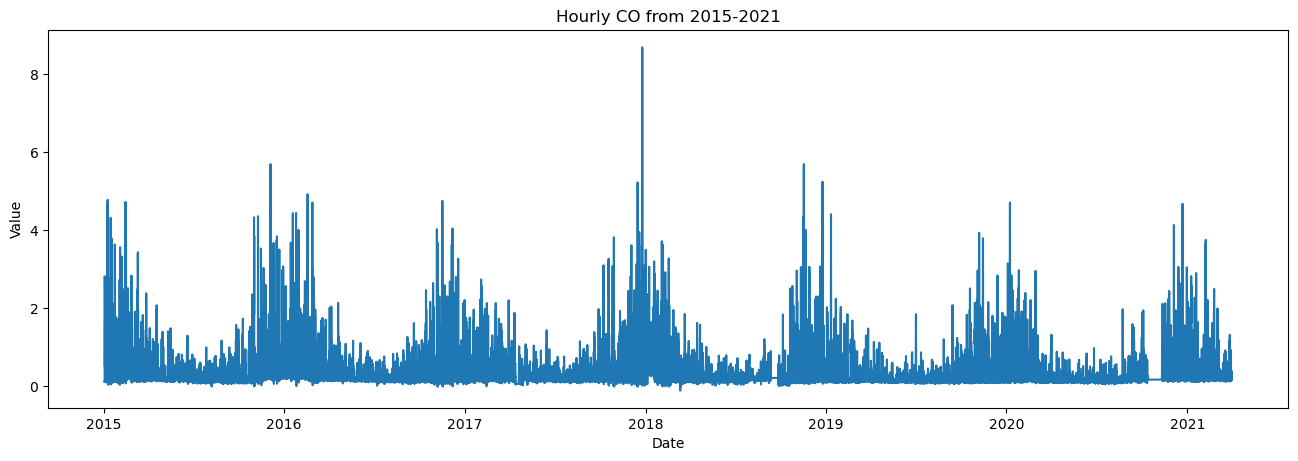

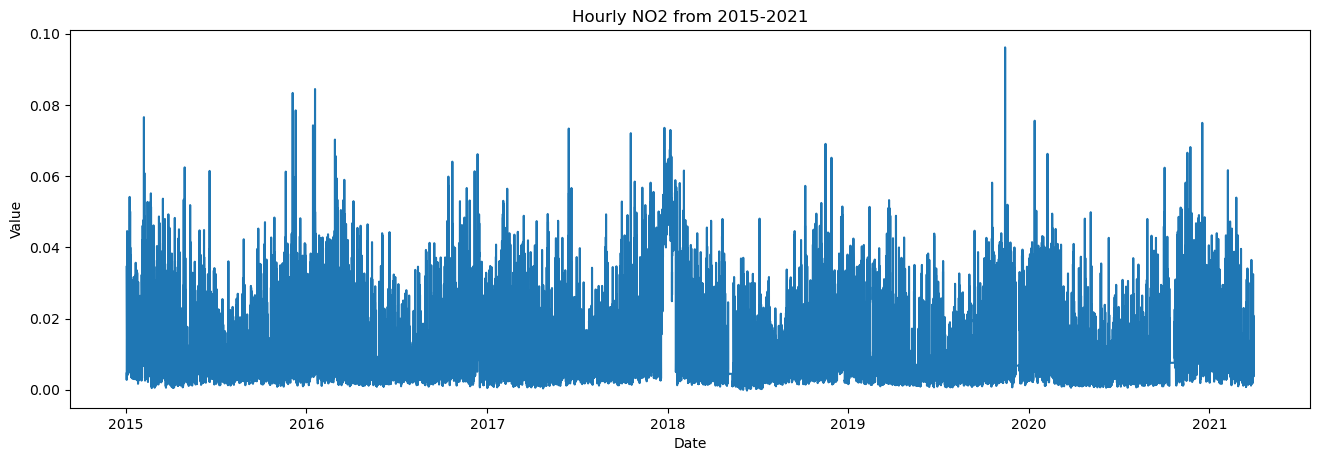

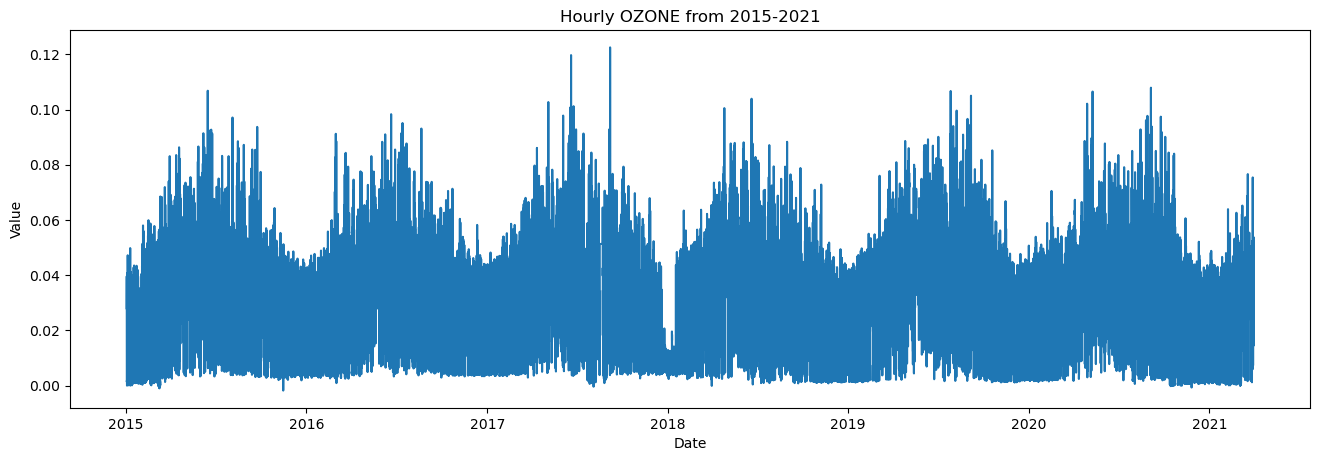

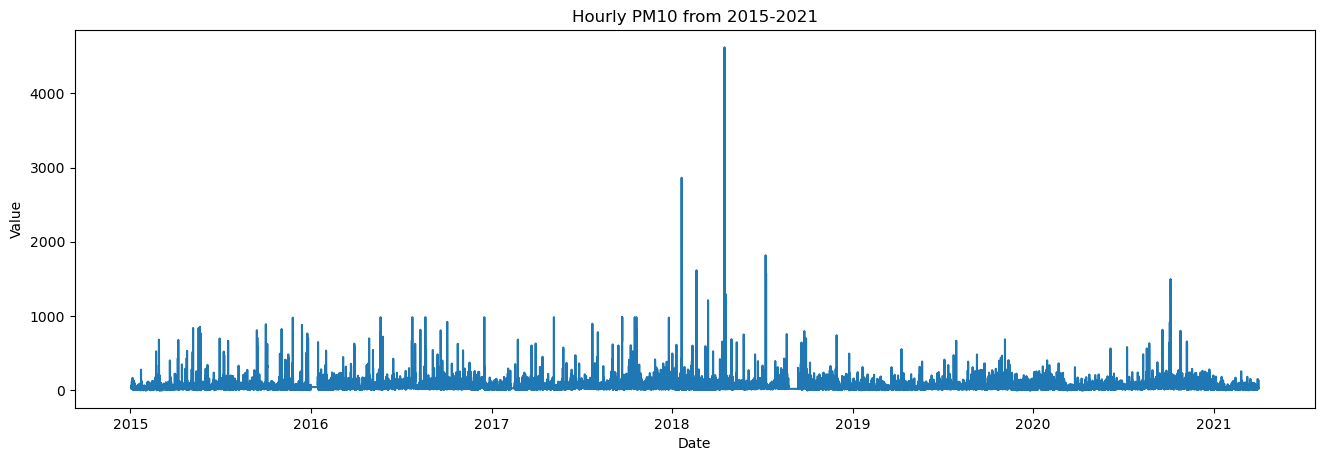

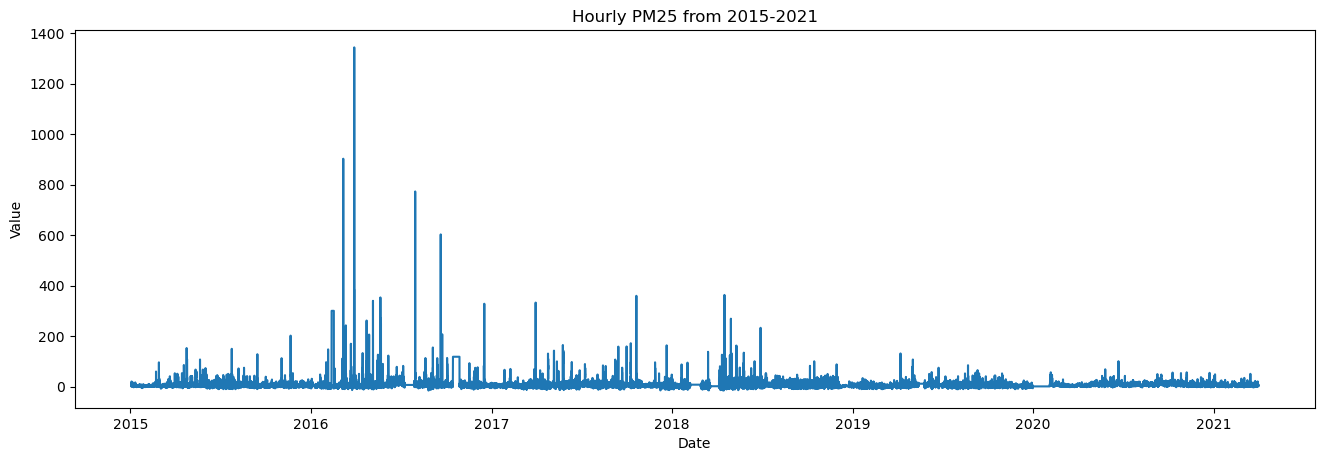

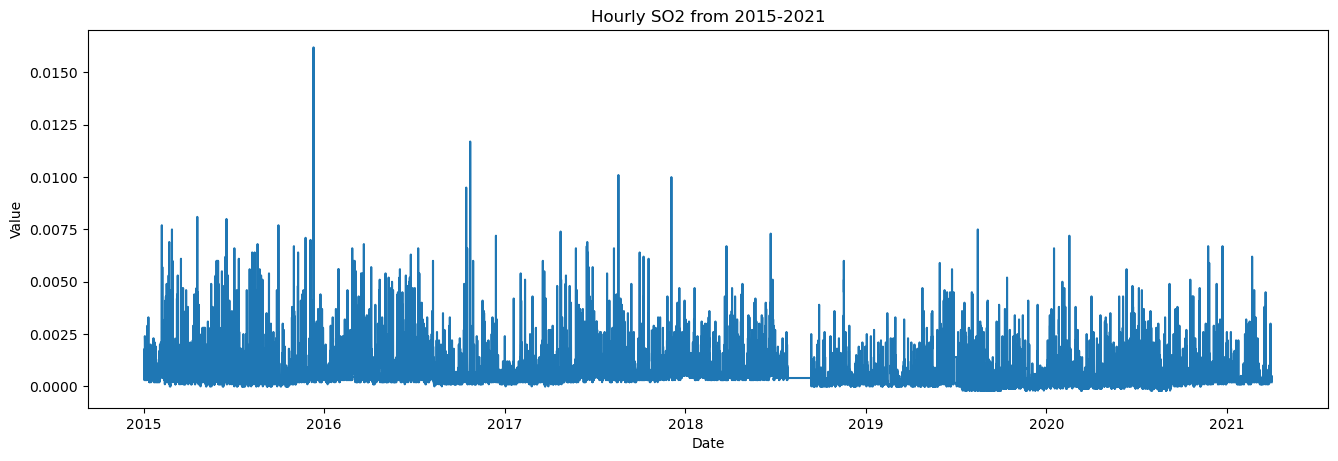

In [19]:
pollutants=['CO','NO2','OZONE','PM10','PM25','SO2']

for i in pollutants:
    plot_df(df, x=df.index, y=df[i], title='Hourly '+ i+' from 2015-2021')    

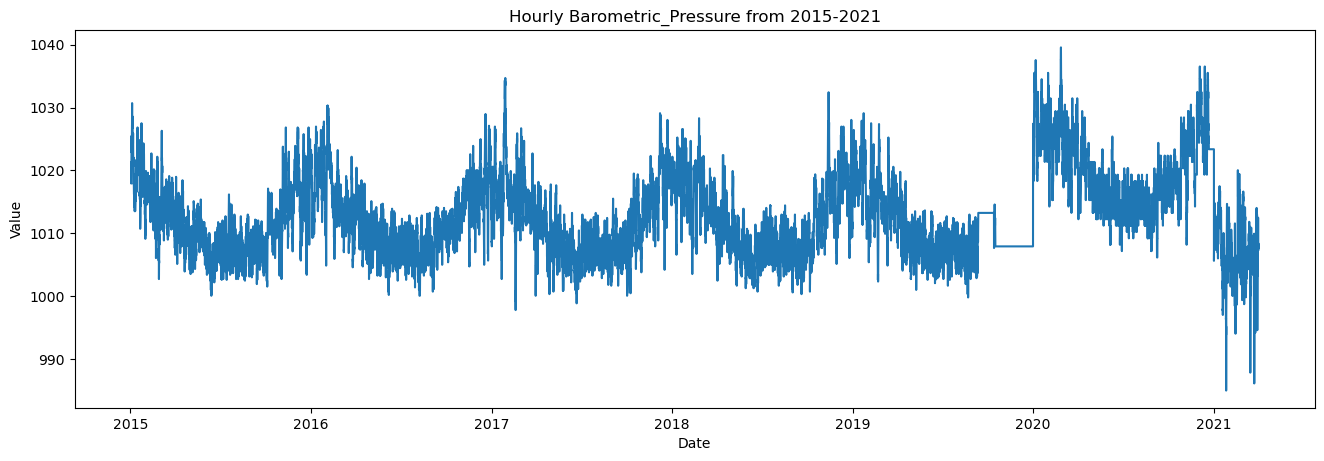

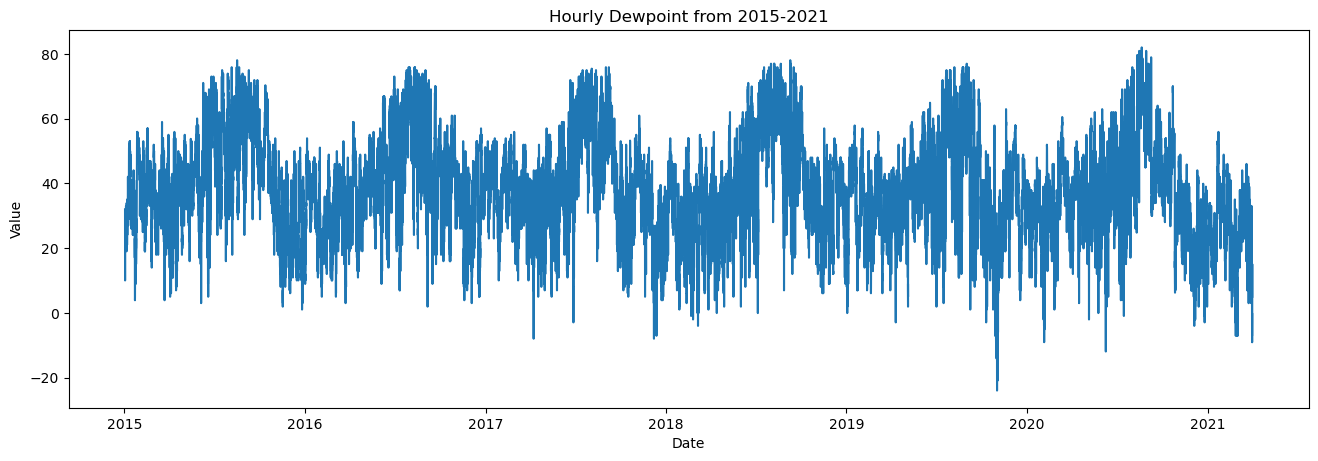

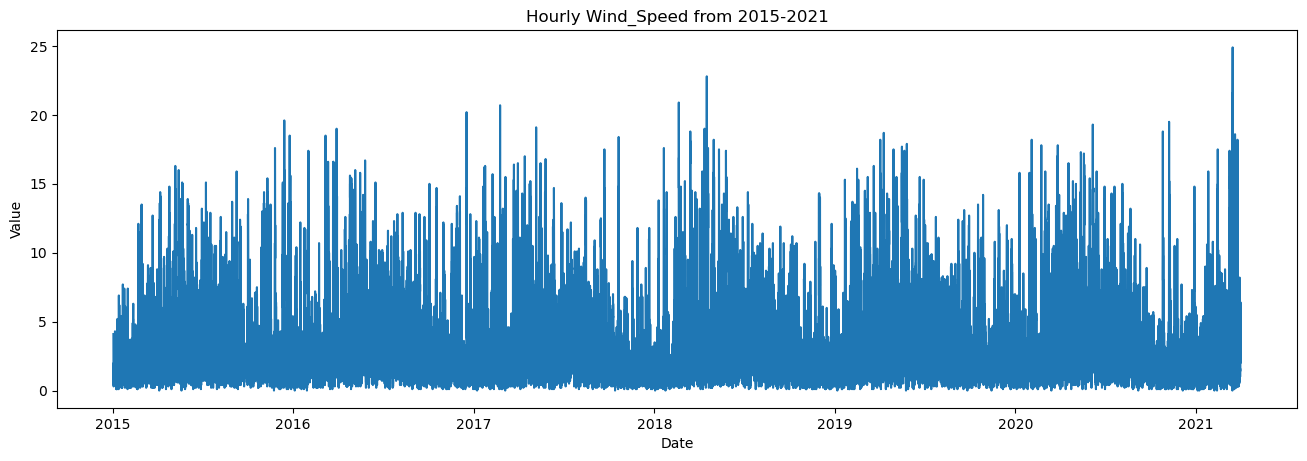

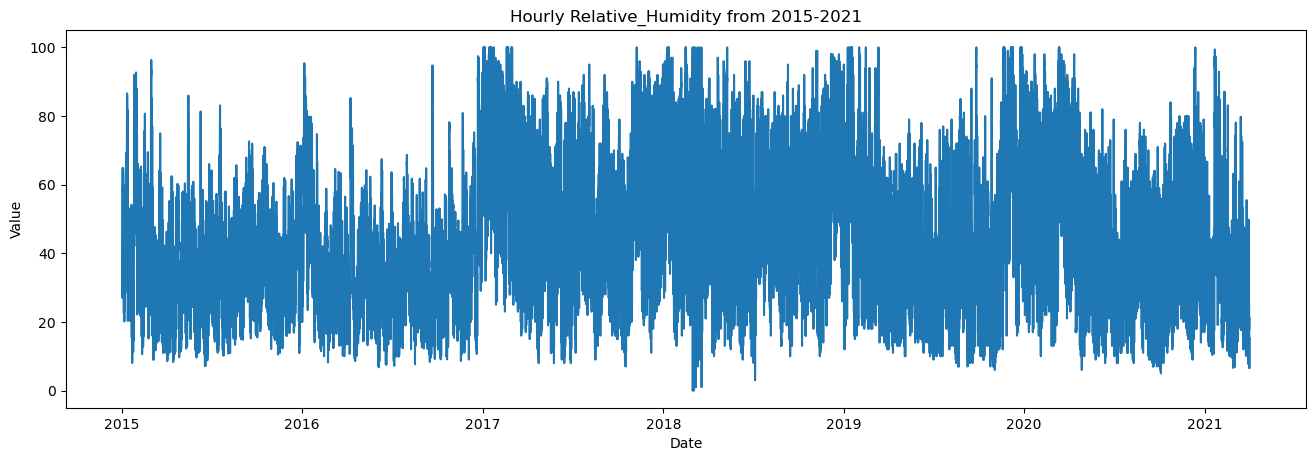

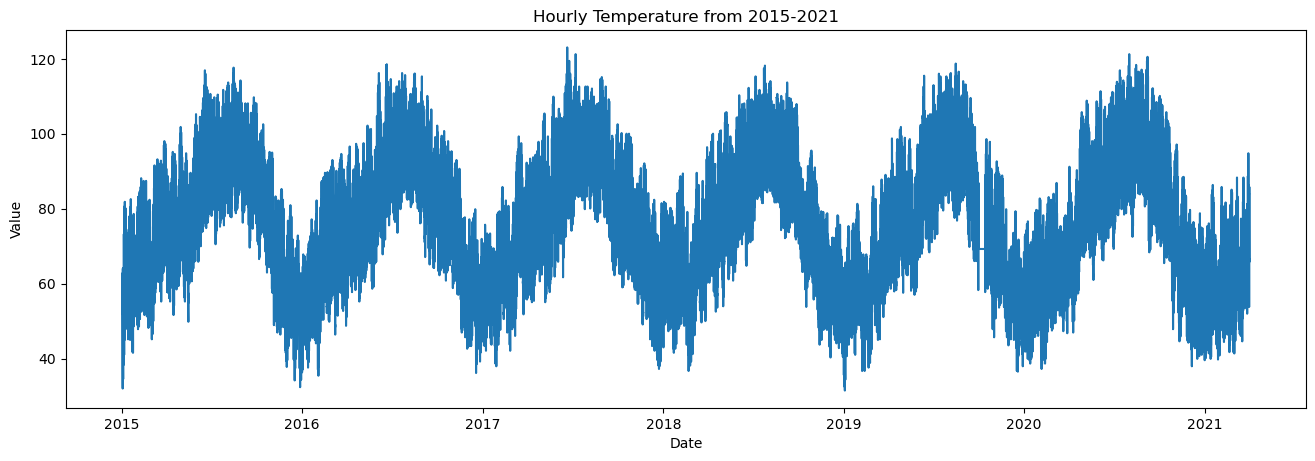

In [20]:
weather=['Barometric_Pressure', 'Dewpoint', 'Wind_Speed', 'Relative_Humidity' ,'Temperature']

for i in weather:
    plot_df(df, x=df.index, y=df[i], title='Hourly '+ i+' from 2015-2021')    

array([[<AxesSubplot:title={'center':'start_hour'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'OZONE'}>],
       [<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'Barometric_Pressure'}>],
       [<AxesSubplot:title={'center':'Dewpoint'}>,
        <AxesSubplot:title={'center':'Relative_Humidity'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Wind_Speed'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

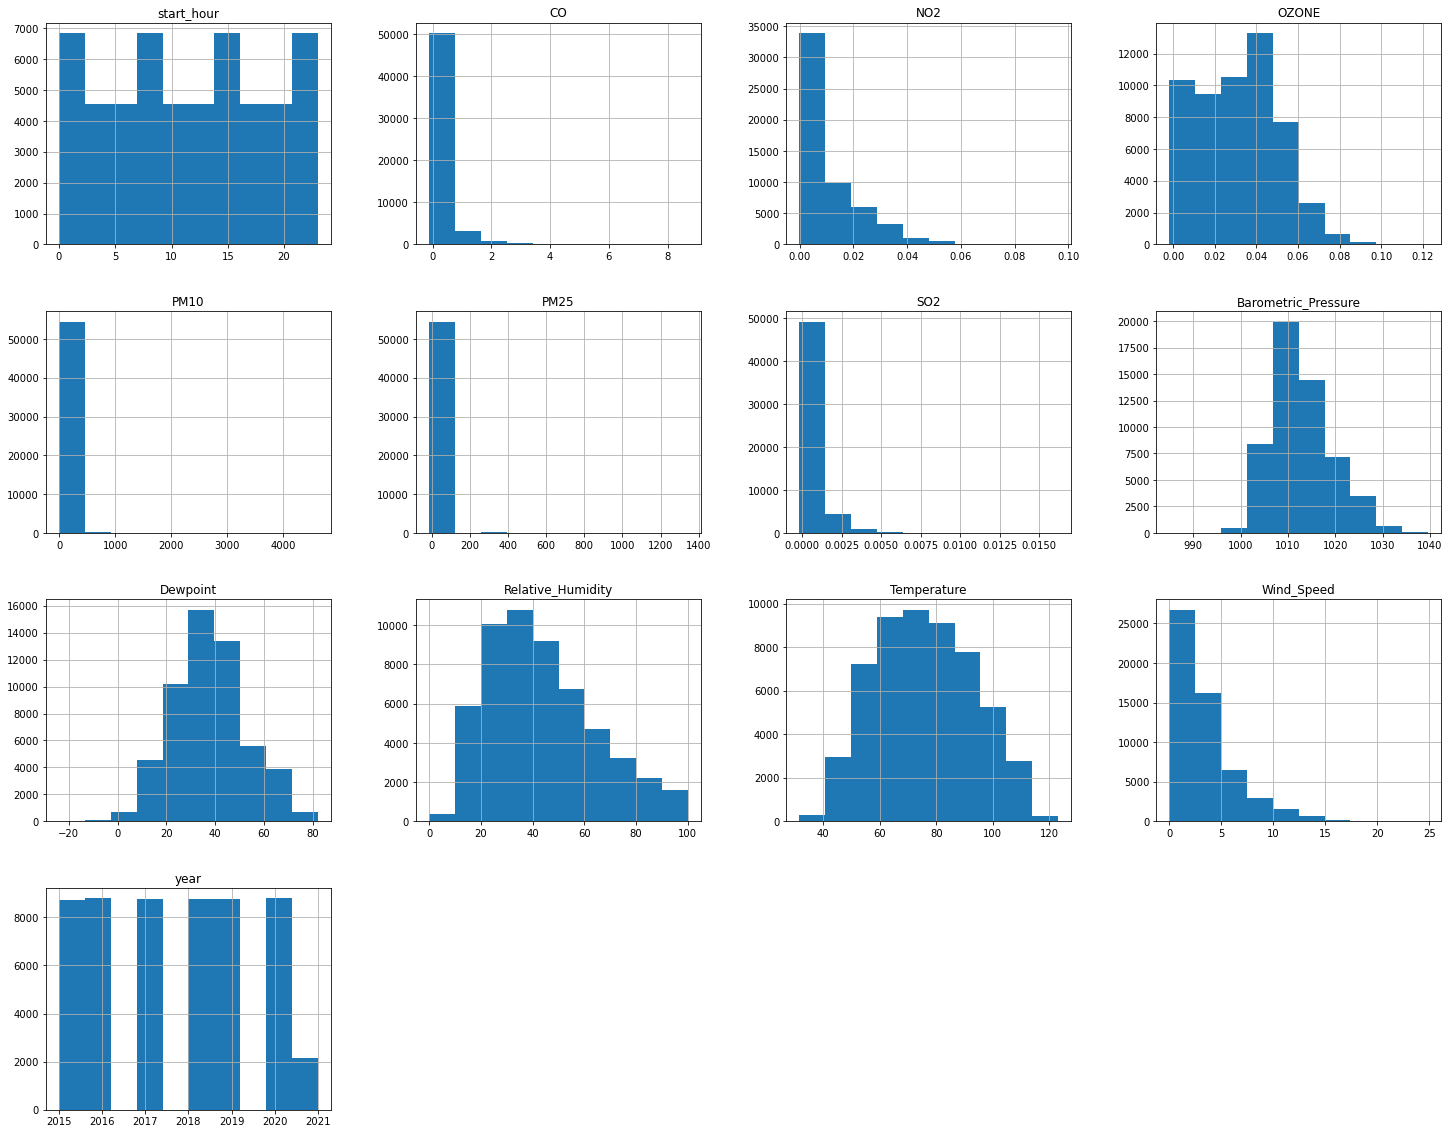

In [21]:
#Histograms for all the time dependent variables.
df.hist(figsize=(25,20))

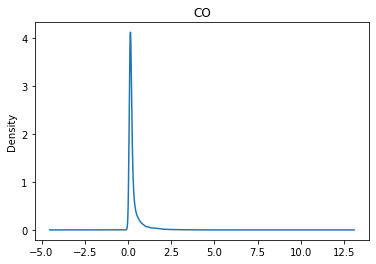

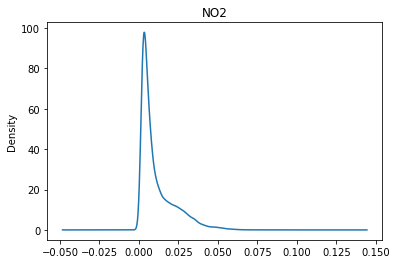

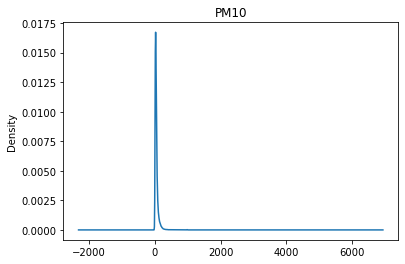

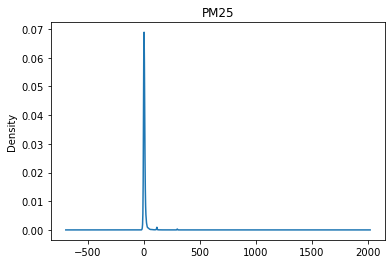

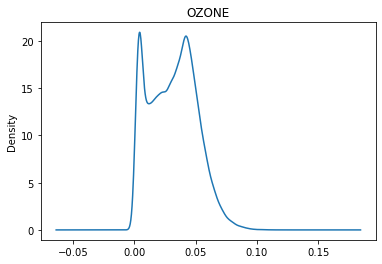

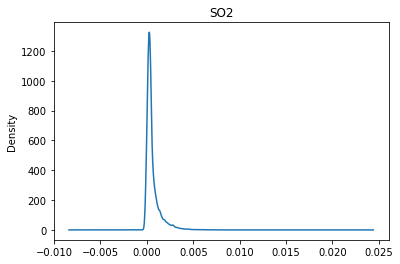

In [22]:
df.CO.plot(kind='kde',title='CO')
plt.show()
df.NO2.plot(kind='kde',title='NO2')
plt.show()
df.PM10.plot(kind='kde',title='PM10')
plt.show()
df.PM25.plot(kind='kde',title='PM25')
plt.show()
df.OZONE.plot(kind='kde',title='OZONE')
plt.show()
df.SO2.plot(kind='kde',title='SO2')
plt.show()

C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='OZONE'>

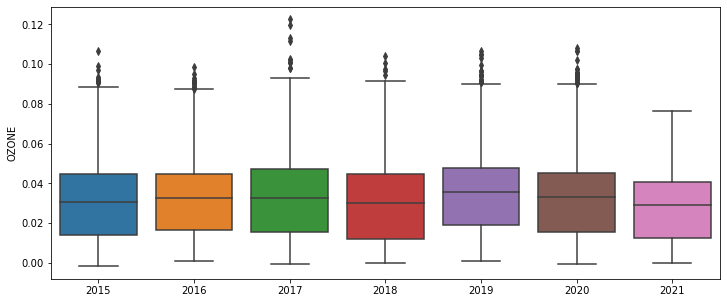

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df.index.year, df.OZONE, ax=ax)

C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='CO'>

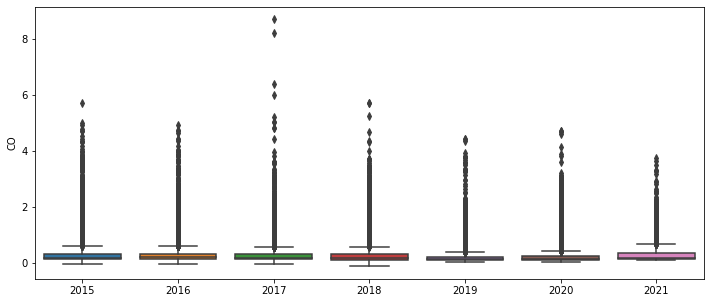

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df.index.year, df.CO, ax=ax)

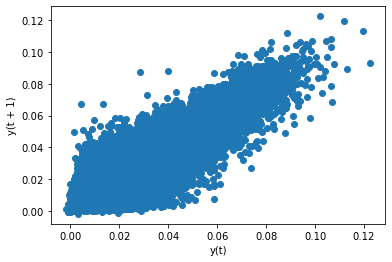

In [25]:
from pandas.plotting import lag_plot
lag_plot(df.OZONE,lag=1)
plt.show()

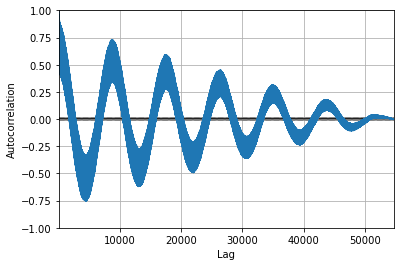

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Temperature)
plt.show()

In [27]:
## Add new columns


def weekend_fl(day):
    if day in ('Friday','Saturday','Sunday'):
        return 'Yes'
    else:
        return 'No'
    

def peak_hour(hour):
    if (hour >= 7 and hour <=9) or (hour >=17 and hour <=19):
        return 'Yes'
    else:
        return 'No'

In [28]:
df['weekday_name']=df.index.day_name() #creating new column with week day

df["datetime"] = pd.to_datetime(df["date"])
# Extract month
df["month"] = df["datetime"].dt.month
#Creating new column season
df.loc[df['month'] == 3,'season'] ='spring'
df.loc[df['month'] == 4,'season'] ='spring'
df.loc[df['month'] == 5,'season'] ='spring'
df.loc[df['month'] == 6,'season'] ='summer'
df.loc[df['month'] == 7,'season'] ='summer'
df.loc[df['month'] == 8,'season'] ='summer'
df.loc[df['month'] == 9,'season'] ='autumn'
df.loc[df['month'] == 10,'season'] ='autumn'
df.loc[df['month'] == 11,'season'] ='autumn'
df.loc[df['month'] == 12,'season'] ='winter'
df.loc[df['month'] == 1,'season'] ='winter'
df.loc[df['month'] == 2,'season'] ='winter'

df.drop(columns=['datetime', 'month'],inplace=True)

In [29]:
 #yes if weekday is Friday, Saturday and Sunday else No.
df['weekend_flag']=df.weekday_name.apply(weekend_fl)
#yes if start_hour between 7 and 9 or 17 and 19
df['peak_hours'] = df.start_hour.apply(peak_hour)

In [30]:
df.head()

,date,start_hour,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,year,weekday_name,season,weekend_flag,peak_hours
2015-01-02 10:00:00,2015-01-02,10,0.110,0.0046,0.0280,47.6,6.42,0.0006,1021.25,32.00,35.84375,51.98,4.1,2015,Friday,winter,Yes,No
2015-01-02 11:00:00,2015-01-02,11,0.104,0.0033,0.0333,41.5,6.42,0.0005,1020.05,30.02,32.15625,55.76,3.0,2015,Friday,winter,Yes,No
2015-01-02 12:00:00,2015-01-02,12,0.097,0.0028,0.0370,31.0,12.50,0.0004,1018.99,17.96,27.46250,60.26,2.3,2015,Friday,winter,Yes,No
2015-01-02 13:00:00,2015-01-02,13,0.122,0.0034,0.0370,27.9,8.26,0.0003,1018.59,15.08,27.15000,61.88,0.8,2015,Friday,winter,Yes,No
2015-01-02 14:00:00,2015-01-02,14,0.129,0.0034,0.0390,28.4,9.53,0.0003,1018.19,10.04,27.06250,62.78,1.7,2015,Friday,winter,Yes,No


In [ ]:
#Save for tableau dashboard data analytics

df.to_csv('Hourly_Air_Data_Tableau.csv',index=True)

In [33]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['date', 'weekday_name', 'season', 'weekend_flag', 'peak_hours'], dtype='object')


In [34]:
df.drop(columns=['date', 'start_hour','year'],inplace=True) # we can drop date and start_hour as we dont need these.
objList = df.select_dtypes(include = "object").columns
print (objList)

le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

#make sure dataset is sorted on date and hour
df.sort_index(inplace=True)

Index(['weekday_name', 'season', 'weekend_flag', 'peak_hours'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54734 entries, 2015-01-02 10:00:00 to 2021-03-31 23:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CO                   54734 non-null  float64
 1   NO2                  54734 non-null  float64
 2   OZONE                54734 non-null  float64
 3   PM10                 54734 non-null  float64
 4   PM25                 54734 non-null  float64
 5   SO2                  54734 non-null  float64
 6   Barometric_Pressure  54734 non-null  float64
 7   Dewpoint             54734 non-null  float64
 8   Relative_Humidity    54734 non-null  float64
 9   Temperature          54734 non-null  float64
 10  Wind_Speed           54734 non-null  float64
 11  weekday_name         54734 non-null  int32  
 12  season               54734 non-null  int32  
 13  weekend_flag         

In [35]:
df.head()

,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,weekday_name,season,weekend_flag,peak_hours
2015-01-02 10:00:00,0.110,0.0046,0.0280,47.6,6.42,0.0006,1021.25,32.00,35.84375,51.98,4.1,0,3,1,0
2015-01-02 11:00:00,0.104,0.0033,0.0333,41.5,6.42,0.0005,1020.05,30.02,32.15625,55.76,3.0,0,3,1,0
2015-01-02 12:00:00,0.097,0.0028,0.0370,31.0,12.50,0.0004,1018.99,17.96,27.46250,60.26,2.3,0,3,1,0
2015-01-02 13:00:00,0.122,0.0034,0.0370,27.9,8.26,0.0003,1018.59,15.08,27.15000,61.88,0.8,0,3,1,0
2015-01-02 14:00:00,0.129,0.0034,0.0390,28.4,9.53,0.0003,1018.19,10.04,27.06250,62.78,1.7,0,3,1,0


In [36]:
#Perform Robust scaling, change it with standard scaler , if we dont get good results
columns_transform=list(df.iloc[:,0:11].columns) #numerical columns to be transformed.

values=df.iloc[:,0:11].values

#RS = RobustScaler()
RS = StandardScaler()

scaled=RS.fit_transform(values)

df_transformed=pd.DataFrame(scaled,columns=df.iloc[:,0:11].columns,index=df.index)

In [37]:
dump(RS, open('scaler.pkl', 'wb'))

In [38]:
df_transformed.head()

,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed
2015-01-02 10:00:00,-0.482597,-0.599879,-0.182026,-0.063857,-0.093282,0.005219,1.331716,-0.390781,-0.359205,-1.371250,0.224861
2015-01-02 11:00:00,-0.496857,-0.717961,0.095772,-0.155189,-0.093282,-0.124040,1.143620,-0.524329,-0.536764,-1.154079,-0.152468
2015-01-02 12:00:00,-0.513493,-0.763377,0.289706,-0.312401,0.166494,-0.253299,0.977468,-1.337763,-0.762775,-0.895541,-0.392585
2015-01-02 13:00:00,-0.454077,-0.708877,0.289706,-0.358815,-0.014666,-0.382557,0.914769,-1.532016,-0.777822,-0.802467,-0.907124
2015-01-02 14:00:00,-0.437441,-0.708877,0.394536,-0.351329,0.039597,-0.382557,0.852070,-1.871958,-0.782035,-0.750760,-0.598401


array([[<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'OZONE'}>],
       [<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SO2'}>],
       [<AxesSubplot:title={'center':'Barometric_Pressure'}>,
        <AxesSubplot:title={'center':'Dewpoint'}>,
        <AxesSubplot:title={'center':'Relative_Humidity'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Wind_Speed'}>, <AxesSubplot:>]],
      dtype=object)

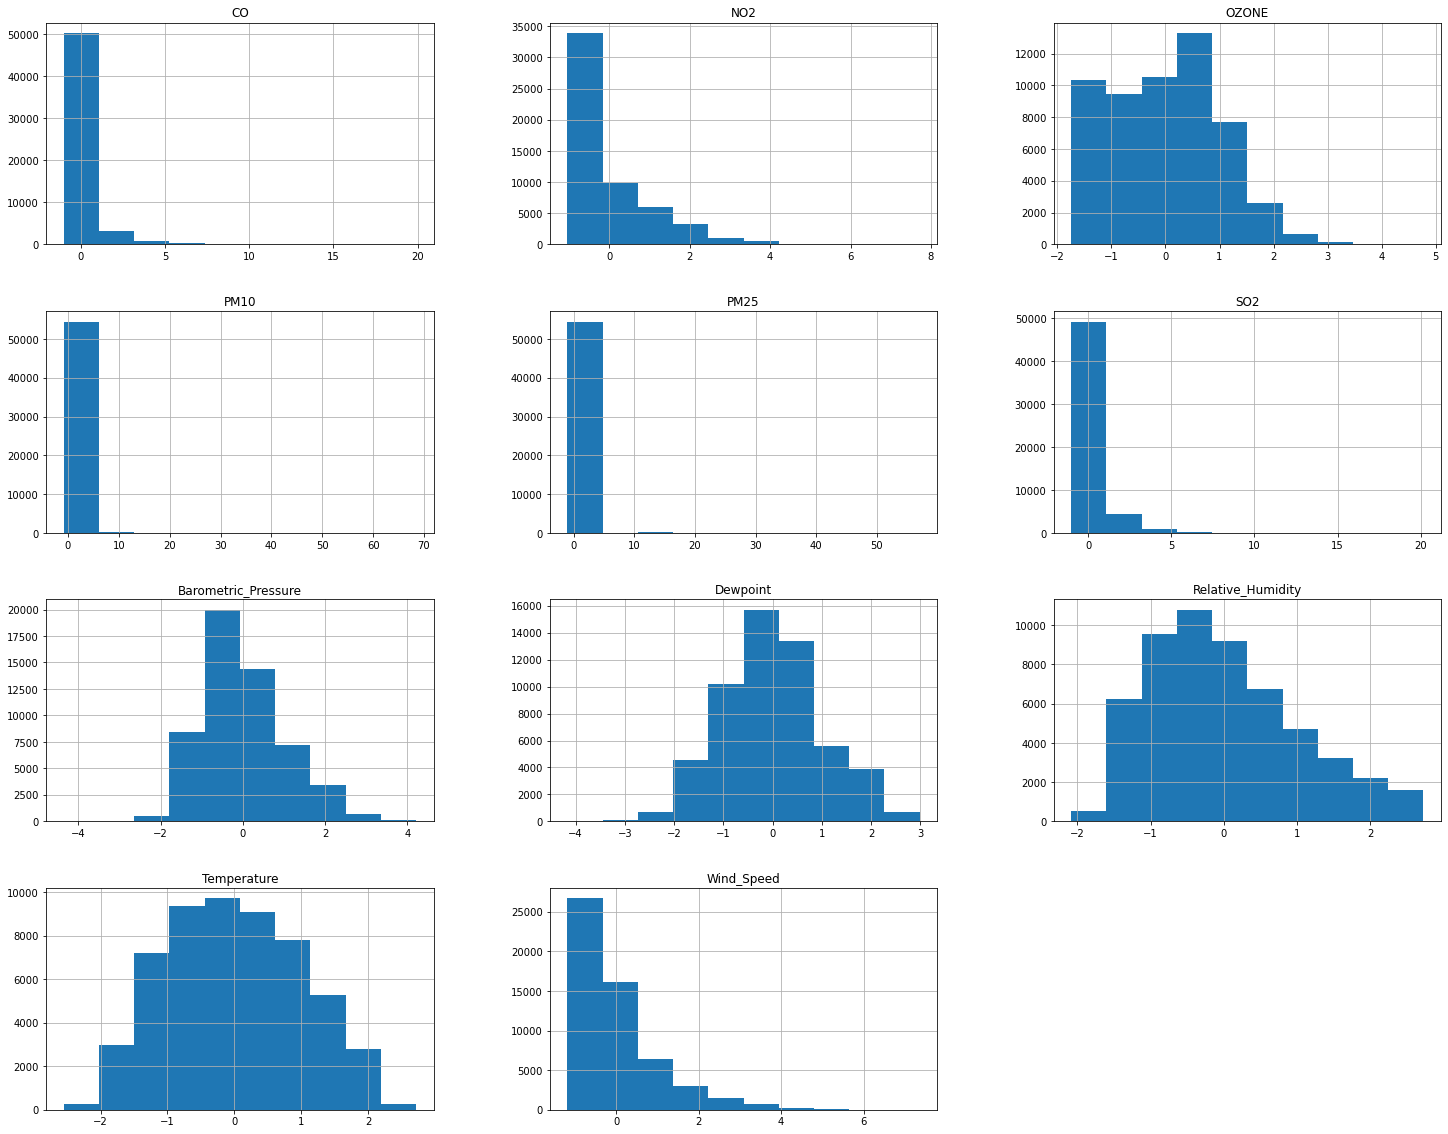

In [38]:
#Histograms for all the time dependent variables.
df_transformed.hist(figsize=(25,20))

C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='OZONE'>

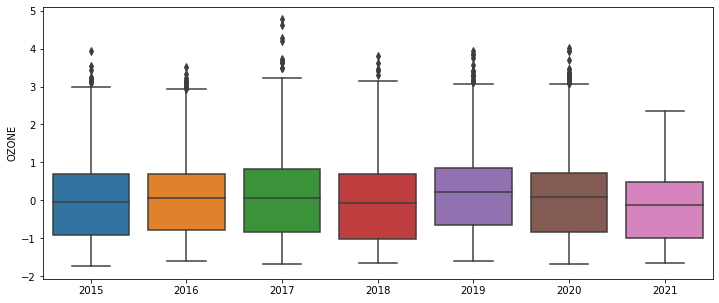

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df_transformed.index.year, df_transformed.OZONE, ax=ax)

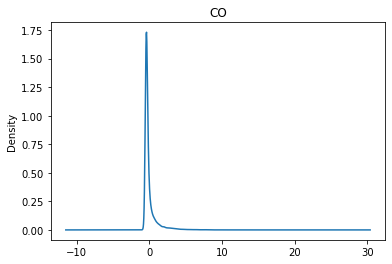

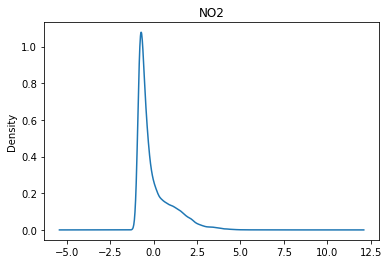

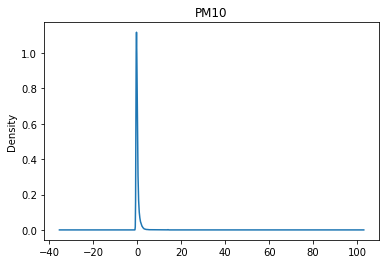

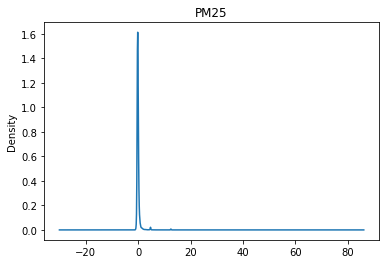

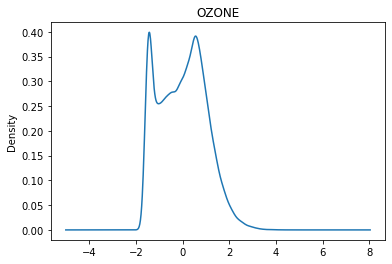

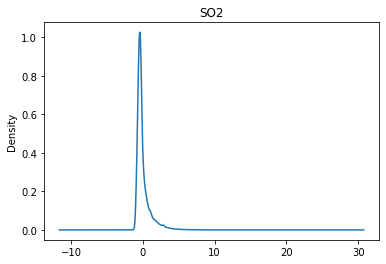

In [40]:
df_transformed.CO.plot(kind='kde',title='CO')
plt.show()
df_transformed.NO2.plot(kind='kde',title='NO2')
plt.show()
df_transformed.PM10.plot(kind='kde',title='PM10')
plt.show()
df_transformed.PM25.plot(kind='kde',title='PM25')
plt.show()
df_transformed.OZONE.plot(kind='kde',title='OZONE')
plt.show()
df_transformed.SO2.plot(kind='kde',title='SO2')
plt.show()

In [41]:
df_transformed['season']=df['season']
df_transformed['weekend_flag']=df['weekend_flag']
df_transformed['peak_hours']=df['peak_hours']

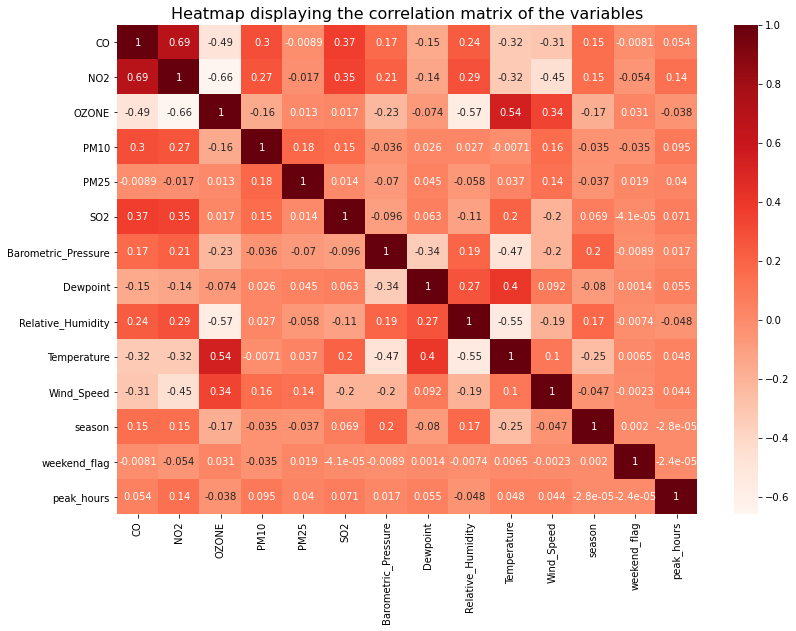

In [42]:
#create correlation plot
corr=df_transformed.corr()

# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))

sns.heatmap(corr,cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [43]:
inverse_scaler=RS.inverse_transform(scaled)

df_inv_transformed=pd.DataFrame(inverse_scaler,columns=df.iloc[:,0:11].columns,index=df.index)

In [44]:
df.head()

,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,weekday_name,season,weekend_flag,peak_hours
2015-01-02 10:00:00,0.110,0.0046,0.0280,47.6,6.42,0.0006,1021.25,32.00,35.84375,51.98,4.1,0,3,1,0
2015-01-02 11:00:00,0.104,0.0033,0.0333,41.5,6.42,0.0005,1020.05,30.02,32.15625,55.76,3.0,0,3,1,0
2015-01-02 12:00:00,0.097,0.0028,0.0370,31.0,12.50,0.0004,1018.99,17.96,27.46250,60.26,2.3,0,3,1,0
2015-01-02 13:00:00,0.122,0.0034,0.0370,27.9,8.26,0.0003,1018.59,15.08,27.15000,61.88,0.8,0,3,1,0
2015-01-02 14:00:00,0.129,0.0034,0.0390,28.4,9.53,0.0003,1018.19,10.04,27.06250,62.78,1.7,0,3,1,0


In [45]:
df_inv_transformed

#len(pt.lambdas_) #to save lamda values directly.

,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed
2015-01-02 10:00:00,0.110,0.0046,0.0280,47.6,6.42,0.0006,1021.2500,32.00,35.84375,51.98,4.1
2015-01-02 11:00:00,0.104,0.0033,0.0333,41.5,6.42,0.0005,1020.0500,30.02,32.15625,55.76,3.0
2015-01-02 12:00:00,0.097,0.0028,0.0370,31.0,12.50,0.0004,1018.9900,17.96,27.46250,60.26,2.3
2015-01-02 13:00:00,0.122,0.0034,0.0370,27.9,8.26,0.0003,1018.5900,15.08,27.15000,61.88,0.8
2015-01-02 14:00:00,0.129,0.0034,0.0390,28.4,9.53,0.0003,1018.1900,10.04,27.06250,62.78,1.7
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 19:00:00,0.291,0.0173,0.0277,140.0,8.00,0.0004,1007.9855,6.09,13.60000,72.68,2.1
2021-03-31 20:00:00,0.383,0.0199,0.0224,82.0,6.00,0.0005,1008.3975,1.05,15.30000,71.78,2.0
2021-03-31 21:00:00,0.252,0.0109,0.0298,60.0,9.00,0.0003,1008.3220,3.02,14.30000,68.54,2.9
2021-03-31 22:00:00,0.202,0.0070,0.0330,49.0,7.00,0.0002,1007.8735,15.07,14.10000,65.84,2.9


In [46]:
df_inv_transformed.isna().sum()

CO                     0
NO2                    0
OZONE                  0
PM10                   0
PM25                   0
SO2                    0
Barometric_Pressure    0
Dewpoint               0
Relative_Humidity      0
Temperature            0
Wind_Speed             0
dtype: int64

In [47]:
df_transformed.head()

,CO,NO2,OZONE,PM10,PM25,SO2,Barometric_Pressure,Dewpoint,Relative_Humidity,Temperature,Wind_Speed,season,weekend_flag,peak_hours
2015-01-02 10:00:00,-0.482597,-0.599879,-0.182026,-0.063857,-0.093282,0.005219,1.331716,-0.390781,-0.359205,-1.371250,0.224861,3,1,0
2015-01-02 11:00:00,-0.496857,-0.717961,0.095772,-0.155189,-0.093282,-0.124040,1.143620,-0.524329,-0.536764,-1.154079,-0.152468,3,1,0
2015-01-02 12:00:00,-0.513493,-0.763377,0.289706,-0.312401,0.166494,-0.253299,0.977468,-1.337763,-0.762775,-0.895541,-0.392585,3,1,0
2015-01-02 13:00:00,-0.454077,-0.708877,0.289706,-0.358815,-0.014666,-0.382557,0.914769,-1.532016,-0.777822,-0.802467,-0.907124,3,1,0
2015-01-02 14:00:00,-0.437441,-0.708877,0.394536,-0.351329,0.039597,-0.382557,0.852070,-1.871958,-0.782035,-0.750760,-0.598401,3,1,0


In [48]:
##Save 2021 data in separate dataset for future testing

df_transformed_final=df_transformed.loc[df_transformed.index < '2021-01-01']

df_2021=df_transformed.loc[df_transformed.index >= '2021-01-01']

In [49]:
df_transformed_final.to_csv('Hourly_Preprocessed_Dataset.csv',index=True)

df_2021.to_csv('PreProcessed_2021.csv',index=True)

In [50]:
df.iloc[43800]

CO                        0.1180
NO2                       0.0033
OZONE                     0.0363
PM10                      6.4000
PM25                      1.2400
SO2                       0.0001
Barometric_Pressure    1026.4200
Dewpoint                 32.0000
Relative_Humidity        48.0000
Temperature              61.1600
Wind_Speed                0.5000
weekday_name              6.0000
season                    3.0000
weekend_flag              0.0000
peak_hours                0.0000
Name: 2020-01-01 10:00:00, dtype: float64